<a href="https://colab.research.google.com/github/silviolima07/residencia_tec_puc_ml/blob/main/aula_13_Assincrona_Ativ_Practica_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grupo:
- Silvio Cesar de Lima - RA 23029232
- Vitor Pereira Andrade - RA 23029249
- Marcos Paulo Cassiano Pena - RA 23029256

## Análise de Desempenho do Modelo Através de Engenharia de Features

### Práticas a serem desenvolvidas:
1. Leitura de dataset presente em diretório do computador
2. Divisão de dados em grupos de treinamento e teste
3. Criação e aplicação de modelo de Machine Learning
4. Seleção de features por critério de limiar de variância
5. Extração de features por Análise de Componentes Principais (PCA)



### Questão 1)
### Nesta atividade, utilize o k-Nearest Neighbor para verificar o
### desempenho do algoritmo de acordo com a engenharia de features empregada.
### Para tal fim, siga os seguintes passos:
1. Utilize o dataset ionosphere presente na pasta datasets para realizar uma tarefa
de classificação binária.
2. Separe os dados de entrada e saída considerando que a coluna de índice
corresponde ao label (target) dos dados de cada linha.
3. Separe os dados em dados de treinamento e teste utilizando a proporção e
, respectivamente, e random state = 0 .
4. Estabeleça arbitrariamente o número de vizinhos , inicialmente.
5. Realize a classificação e obtenha os seguintes resultados:

      a) Acurácia

      b) Precisão

      c) Recall

      d) F1-Score

      e) Plote a Matriz de Confusão

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Questão 2)
### Compare os resultados obtidos em todos os processos do item anterior
### e justifique as diferenças obtidas através dos conceitos de engenharia
### de features estudados durante as aulas síncronas.

### Import libs necessárias

In [2]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, chi2

### 1) Leitura de dataset

In [3]:
data = "/content/drive/MyDrive/DATASETS/ionosphere.data"

df = pd.read_csv(data, header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [5]:
new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature" + str(i))

    i += 1

df.columns = new_col

### Converter coluna target de category para numeric.

In [6]:
df['target'] = df.target.astype('category')
encoding = {'g': 1, 'b': 0}
df.target.replace(encoding, inplace=True)


### Dataset gerado

In [7]:

df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [8]:
print("df\nColunas:",df.shape[0],"\nLinhas:", df.shape[1],'\nColunas:', df.columns.to_list())

df
Colunas: 351 
Linhas: 35 
Colunas: ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'target']


### 2) Separe os dados de entrada e saída considerando que a coluna de índice corresponde ao label (target) dos dados de cada linha.

In [9]:
# Remover a coluna target em X
X = df.drop(['target'], axis=1)
#
# Separar a coluna target em y
y = df['target']

In [10]:
X.shape

(351, 34)

In [11]:
y.shape

(351,)

### 3) Separe os dados em dados de treinamento e teste utilizando a proporção 70%¨e 30%, respectivamente, e random state = 0.

### Divisão em treino e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0) # 70% training and 30% test

In [13]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (245, 34)
X_test: (106, 34) 

y_train: (245,)
y_test: (106,)


### 4) Estabeleça arbitrariamente o número de vizinhos , inicialmente.

In [14]:
n = 5
# Knn Classifier
clf = KNeighborsClassifier(n_neighbors=n)

#Train the model using the training sets
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 5) Realize a classificação e obtenha os seguintes resultados:
- a) Acurácia
- b) Precisão
- c) Recall
- d) F1-Score
- e) Plote a Matriz de Confusão

In [15]:
l_metrica = []
l_qtd_colunas = []
l_acuracia = []
l_precisao = []
l_recall = []
l_f1_score = []
l_status = []

### Acurácia

### Acurácia é a taxa obtida pela divisão da soma dos labels verdadeiros positivos mais os labels de verdadeiros negativos pela soma de todos os labels presentes, sem verdadeiros ou falsos positivos e negativos.
- Equaçao: (VP+VN) / (VP+VN+FN+FP)

In [16]:
y_predicted = clf.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 84.0%


In [17]:
temp = y_test == y_predicted
temp.value_counts()
number_True = 91
total = np.sum(91+15)
print("Acuracia:", round(number_True/total,4))

Acuracia: 0.8585


In [18]:
acuracia = round(accuracy_score(y_test, y_predicted),2)
print(acuracia)
l_acuracia.append(acuracia)

0.84


### Precisao

### Precision e Recall
#### - Precision é a taxa obtida pela divisão do numero de labels positivos verdadeiros pela soma do numero de labels positivos verdadeiros mais o numero de labels falso positivos.
- Equaçao: VP / (VP+FP)

In [19]:
precision = precision_score(y_test, y_predicted)
precision = round(precision,2)
print(precision)
l_precisao.append(precision)

0.8


### Recall

#### - Recall é a taxa obtida pela divisão do numero de labels positivos verdadeiros pela soma do numero de labels positivos verdadeiros mais o numero de labels falso negativos.
- Equacao: VP / (VP+FN)

In [20]:
recall = recall_score(y_test, y_predicted)
recall = round(recall,2)
print(recall)
l_recall.append(recall)


0.97


### F1-Score

In [21]:
f1_score = 2 * (precision * recall)/(precision + recall)
f1_score = round(f1_score,2)
print(f1_score)
l_f1_score.append(f1_score)


0.88


### Confusion Matrix

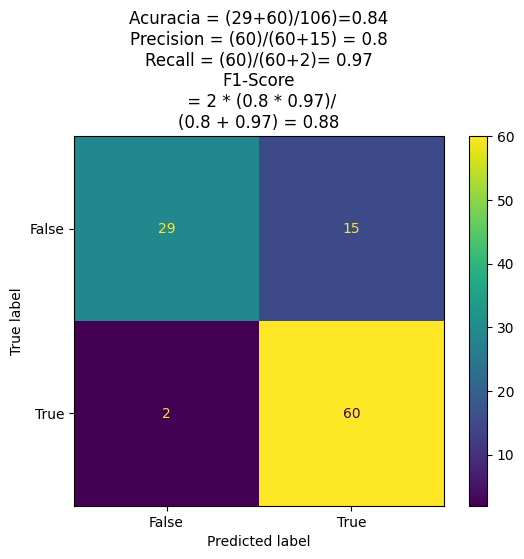

In [22]:
confusion = confusion_matrix(y_test, y_predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.title("Acuracia = (29+60)/106)=0.84\nPrecision = (60)/(60+15) = 0.8\nRecall = (60)/(60+2)= 0.97\nF1-Score\n = 2 * (0.8 * 0.97)/\n(0.8 + 0.97) = 0.88")
plt.show()

In [23]:
l_qtd_colunas.append(X_train.shape[1])
#
l_status.append('Original')
#
data = {'acuracia':l_acuracia,
        'precisao':l_precisao,
        'recall': l_recall,
        'f1-score': l_f1_score,
        'qtd_variaveis':l_qtd_colunas,
        'status':l_status}


df1 = pd.DataFrame(data)
df1

,acuracia,precisao,recall,f1-score,qtd_variaveis,status
0,0.84,0.8,0.97,0.88,34,Original


### 1. Repita todo o processo dos itens 1 até 5 utilizando o método de Seleção de Features por limiar de variância, considerando o limiar de 35%.


### Seleção de Features por Limiar de Variancia


In [24]:
df.shape

(351, 35)

In [25]:
data = df.drop(['target'], axis=1)

In [26]:
data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [27]:
# Estabelecendo o limiar de variancia
limiar_de_variancia = 0.35

# Criando o modelo de selecao
selecao = VarianceThreshold(threshold = limiar_de_variancia)

# Selecionando as features
features_selecionadas = selecao.fit_transform(data)

# Verificando a estrutura dos dados selecionados
print("Formato dos dados Originais:", np.shape(data))
print("Formato dos dados após a seleção de features:", np.shape(features_selecionadas))

Formato dos dados Originais: (351, 34)
Formato dos dados após a seleção de features: (351, 6)


### Divisão em treino e teste

In [28]:
X = features_selecionadas
y = df['target']
#
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0) # 70% training and 30% test
#
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (245, 6)
X_test: (106, 6) 

y_train: (245,)
y_test: (106,)


### Estabeleça arbitrariamente o número de vizinhos , inicialmente.

In [29]:
n = 5
# Knn Classifier
clf = KNeighborsClassifier(n_neighbors=n)

#Train the model using the training sets
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Realize a classificação e obtenha os seguintes resultados:
    a) Acurácia
    b) Precisão
    c) Recall
    d) F1-Score
    e) Plote a Matriz de Confusão

### Limiar_variancia - 35%
- Acuracia
- Precisao
- Recall
- F1-Score
- Confusion Matrix

Limiar_variancia = 35%

Acurácia: 0.81
Precision 0.78
Recall: 0.95
F1-Score: 0.86

Confusion Matrix


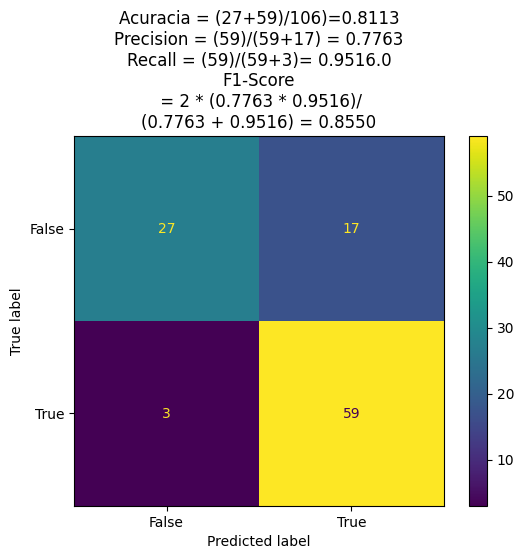

In [30]:
print("Limiar_variancia = 35%\n")
y_predicted = clf.predict(X_test)
acuracia = round(accuracy_score(y_test, y_predicted),2)
print("Acurácia:",acuracia)
l_acuracia.append(acuracia)
#
precision = precision_score(y_test, y_predicted)
precision = round(precision,2)
print("Precision",precision)
l_precisao.append(precision)
#
recall = recall_score(y_test, y_predicted)
recall = round(recall,2)
print("Recall:",recall)
l_recall.append(recall)
#
f1_score = 2 * (precision * recall)/(precision + recall)
f1_score = round(f1_score,2)
print("F1-Score:",f1_score)
l_f1_score.append(f1_score)
#
#
print("\nConfusion Matrix")
confusion = confusion_matrix(y_test, y_predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.title("Acuracia = (27+59)/106)=0.8113\nPrecision = (59)/(59+17) = 0.7763\nRecall = (59)/(59+3)= 0.9516.0\nF1-Score\n = 2 * (0.7763 * 0.9516)/\n(0.7763 + 0.9516) = 0.8550")
plt.show()




In [31]:
l_qtd_colunas.append(X_train.shape[1])
#
l_status.append('Limiar_de_variancia')
#
data = {'acuracia':l_acuracia,
        'precisao':l_precisao,
        'recall': l_recall,
        'f1-score': l_f1_score,
        'qtd_variaveis':l_qtd_colunas,
        'status':l_status}

df2 = pd.DataFrame(data)
df2[df2.status == 'Limiar_de_variancia']

,acuracia,precisao,recall,f1-score,qtd_variaveis,status
1,0.81,0.78,0.95,0.86,6,Limiar_de_variancia


### 2. Repita todo o processo dos itens 1 até 5 utilizando o método de Extração de Features por Análise de Componentes Principais (PCA), considerando a porcentagem de informação a ser mantida no problema de 85%.

### Seleção do Número de Componentes Principais (PCA)

In [32]:
df.shape

(351, 35)

In [33]:
data = df.drop(['target'], axis=1)

In [34]:
data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [35]:
# Criando o modelo através de um número de componentes principais definido pela porcentagem de variancia
pca = PCA(n_components = 0.85)

# Aplicando a PCA
P = pca.fit_transform(data)

print("Original:", data.shape)
print("PCA 85%:", P.shape)

Original: (351, 34)
PCA 85%: (351, 15)


### Divisão em treino e teste

In [36]:
features_selecionadas = P
X = features_selecionadas
y = df['target']
#
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0) # 70% training and 30% test
#
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (245, 15)
X_test: (106, 15) 

y_train: (245,)
y_test: (106,)


### Estabeleça arbitrariamente o número de vizinhos , inicialmente.

In [37]:
n = 5
# Knn Classifier
clf = KNeighborsClassifier(n_neighbors=n)

#Train the model using the training sets
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Realize a classificação e obtenha os seguintes resultados:
    a) Acurácia
    b) Precisão
    c) Recall
    d) F1-Score
    e) Plote a Matriz de Confusão

### PCA - 85%
- Acuracia
- Precisao
- Recall
- F1-Score
- Confusion Matrix

In [38]:
metrica_pca = []
resultado_pca = []

PCA = 85%

Acurácia: 0.87
Precision 0.83
Recall: 0.97
F1-Score: 0.89

Confusion Matrix


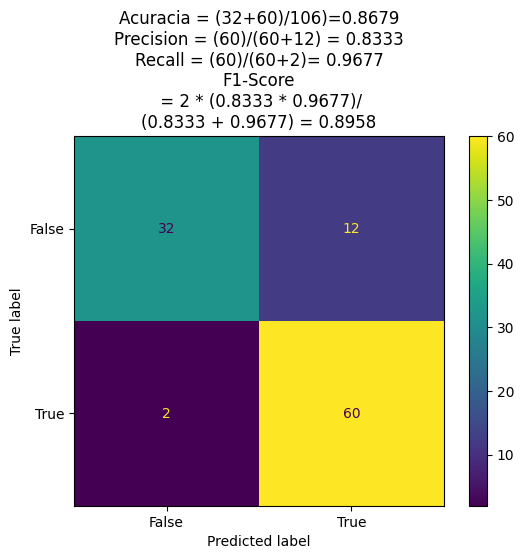

In [39]:
print("PCA = 85%\n")
y_predicted = clf.predict(X_test)
acuracia = round(accuracy_score(y_test, y_predicted),2)
print("Acurácia:",acuracia)
l_acuracia.append(acuracia)
#
precision = precision_score(y_test, y_predicted)
precision = round(precision,2)
print("Precision",precision)
l_precisao.append(precision)
#
recall = recall_score(y_test, y_predicted)
recall = round(recall,2)
print("Recall:",recall)
l_recall.append(recall)
#
f1_score = 2 * (precision * recall)/(precision + recall)
f1_score = round(f1_score,2)
print("F1-Score:",f1_score)
l_f1_score.append(f1_score)
#
#
print("\nConfusion Matrix")
confusion = confusion_matrix(y_test, y_predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.title("Acuracia = (32+60)/106)=0.8679\nPrecision = (60)/(60+12) = 0.8333\nRecall = (60)/(60+2)= 0.9677\nF1-Score\n = 2 * (0.8333 * 0.9677)/\n(0.8333 + 0.9677) = 0.8958")
plt.show()

In [40]:
l_qtd_colunas.append(X_train.shape[1])
#
l_status.append('PCA')
#
data = {'acuracia':l_acuracia,
        'precisao':l_precisao,
        'recall': l_recall,
        'f1_score': l_f1_score,
        'qtd_variaveis':l_qtd_colunas,
        'status':l_status}

df3 = pd.DataFrame(data)
df3[df3.status == 'PCA']

,acuracia,precisao,recall,f1_score,qtd_variaveis,status
2,0.87,0.83,0.97,0.89,15,PCA


### Final

In [41]:
print("\n\tCom dataset original\n",df1[df1.status == 'Original'])
print("\n\tAplicando Limiar de Variancia\n",df2[df2.status == 'Limiar_de_variancia'])
print("\n\tAplicando PCA\n",df3[df3.status == 'PCA'])


	Com dataset original
    acuracia  precisao  recall  f1-score  qtd_variaveis    status
0      0.84       0.8    0.97      0.88             34  Original

	Aplicando Limiar de Variancia
    acuracia  precisao  recall  f1-score  qtd_variaveis               status
1      0.81      0.78    0.95      0.86              6  Limiar_de_variancia

	Aplicando PCA
    acuracia  precisao  recall  f1_score  qtd_variaveis status
2      0.87      0.83    0.97      0.89             15    PCA


### Gráfico com as Metricas com Diferentes Quantidades de Variaveis

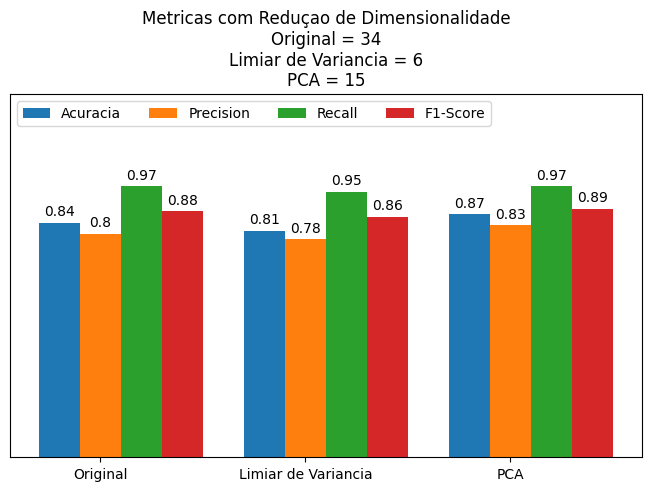

In [43]:
status = ('Original', 'Limiar de Variancia', 'PCA')
metricas = {
    'Acuracia': df3.acuracia.values,
    'Precision': df3.precisao.values,
    'Recall': df3.recall.values,
    'F1-Score': df3.f1_score.values
}

x = np.arange(len(status))
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metricas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Metricas com Reduçao de Dimensionalidade\nOriginal = 34\nLimiar de Variancia = 6\nPCA = 15')
ax.set_xticks(x + width, status)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.3)
ax.get_yaxis().set_visible(False)

plt.savefig("metricas.png")

plt.show()

In [ ]:
status = ('Original', 'Limiar de Variancia', 'PCA')
metricas = {
    'Acuracia': df3.acuracia.values,
    'Precision': df3.precisao.values,
    'Recall': df3.recall.values,
    'F1-Score': df3.f1_score.values
}

x = np.arange(len(status))
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metricas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Metricas com Reduçao de Dimensionalidade\nOriginal = 34\nLimiar de Variancia = 6\nPCA = 15')
ax.set_xticks(x + width, status)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.3)
ax.get_yaxis().set_visible(False)

plt.savefig("metricas.png")

plt.show()

In [48]:
df3

,acuracia,precisao,recall,f1_score,qtd_variaveis,status
0,0.84,0.80,0.97,0.88,34,Original
1,0.81,0.78,0.95,0.86,6,Limiar_de_variancia
2,0.87,0.83,0.97,0.89,15,PCA


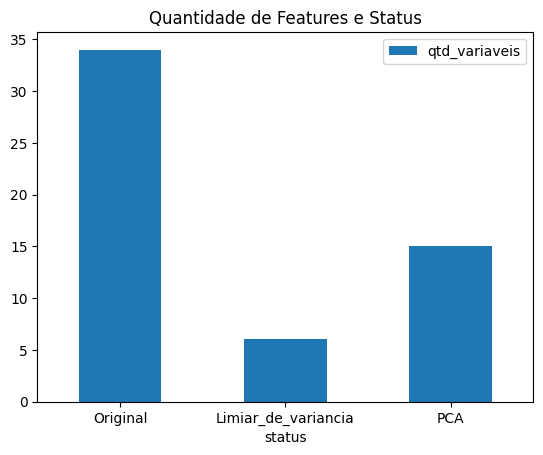

In [47]:
ax = df3.plot.bar(x='status', y='qtd_variaveis', rot=0)
plt.title("Quantidade de Features e Status");


### Questão 2)
### Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas através dos conceitos de engenharia  de features estudados durante as aulas síncronas.


## ANÁLISE
### PCA
- agregação de atributos
- extrair apenas as informações mais relevantes de um conjunto de dados
- comprimir o tamanho do conjunto de dados original, simplificando assim sua descrição
- o conjunto de dados original é reduzido a número de componentes desejado.

### Limiar de variância
- seleção de atributos
- Consiste em manter apenas os atributos da base de dados original que possuam variância acima de um valor pré-estabelecido.



### O dataset original possuia 34 features que foram usadas para treinar o classificador Knn.
### Na primeira avaliação a menor metrica encontrada foi de Precision com valor de 0.8 e maior valor de 0.97 de Recall. Foram usados todos as features disponíveis.

### Na segunda avaliação, o número features foi reduzido através da aplicação de um valor de Limiar de variancia igual a 35%. Assim foram selecionadas 6 features. O menor valor de avaliação foi Precision com 0.78 e maior valor de Recall com 0.95.

### Na terceira avaliação, as 34 features foram reduzidas através do PCA com 85% a 15 componentes. O menor valor encontrado foi de 0.83 para a Precision e 0.97 para o Recall.

### O objetivo de redução de features, seja por seleção ou agregação é diminuir o custo de processamento para treinamento do modelo, sem perder a performance definida como aceitável para o modelo treinado.

### Todos modelos treinados atingiram altos valores de métricas, mesmo com qauntidades de features bem diferentes.

### Novas features poderiam ser criadas a partir das existentes e  poderiam substituir as features atuais e gerar outros conjuntos de dados com avaliação igual, melhor ou pior. Por isso deve-se estabelecer um valor de métrica aceitável para encerrar essa etapa na criação de modelos de machine learning.